<a href="https://colab.research.google.com/github/kkattt51/ArtInt/blob/main/7_face_mask_classification_task_with_best_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libs

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
SEED = 24

def set_seed(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
set_seed()

# Load data

In [ ]:
PATH = '../input/face-mask-detection/Dataset'

IMAGE_SIZE = (224, 224)
EPOCHS = 70
BATCH_SIZE = 128
NUM_CLASSES = 3

In [ ]:
train_gen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=.3,
    rotation_range=45,
    validation_split=.2
)

val_gen = ImageDataGenerator(validation_split=.2)

In [ ]:
train_data = train_gen.flow_from_directory(
    PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    subset='training'
)

val_data = val_gen.flow_from_directory(
    PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=False,
    subset='validation'
)

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


# Define model

**EfficientNetB0** is pretty good model at image classification among the others pretrained models.

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

These callbacks are very useful. I'm gonna stop model training when it tends to overfit. Also I will save model with best weights so I can use it later in other tasks.

In [ ]:
early_stopping = EarlyStopping(patience=5, verbose=1)
checkpoint = ModelCheckpoint('mask_model.h5', save_best_only=True, verbose=1)
lr_reduce = ReduceLROnPlateau(patience=2, verbose=1)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(amsgrad=True),
    loss='categorical_crossentropy',
#     our data classes are perfectly balanced so I'm able to use simple accuracy metric
    metrics=['acc']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stopping, checkpoint, lr_reduce]
)

Epoch 1/70
57/57 [==============================] - 175s 3s/step - loss: 0.2894 - acc: 0.8784 - val_loss: 0.1390 - val_acc: 0.9677

Epoch 00001: val_loss improved from inf to 0.13901, saving model to mask_model.h5
Epoch 2/70
57/57 [==============================] - 99s 2s/step - loss: 0.0286 - acc: 0.9901 - val_loss: 0.3755 - val_acc: 0.9337

Epoch 00002: val_loss did not improve from 0.13901
Epoch 3/70
57/57 [==============================] - 100s 2s/step - loss: 0.0169 - acc: 0.9941 - val_loss: 0.0786 - val_acc: 0.9833

Epoch 00003: val_loss improved from 0.13901 to 0.07863, saving model to mask_model.h5
Epoch 4/70
57/57 [==============================] - 101s 2s/step - loss: 0.0096 - acc: 0.9968 - val_loss: 0.0582 - val_acc: 0.9916

Epoch 00004: val_loss improved from 0.07863 to 0.05819, saving model to mask_model.h5
Epoch 5/70
57/57 [==============================] - 100s 2s/step - loss: 0.0122 - acc: 0.9955 - val_loss: 0.0422 - val_acc: 0.9922

Epoch 00005: val_loss improved from 

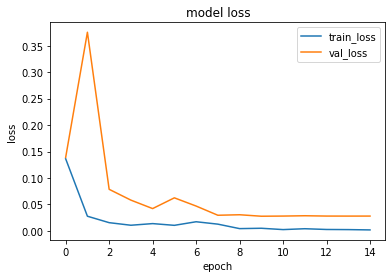

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

As we can see model has very high (**100%**!!!) validation accuracy. According to plots model isn't overfitted at all!

Feel free to write down any comments about this notebook. Thank you!